In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:

# Loading the dataset
data = pd.read_csv("kidney_cleaned.csv",index_col=0)
data.drop(["id"],axis=1,inplace=True)

In [3]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [4]:
# Data Preprocessing
# Checking for missing values
print(data.isnull().sum())

# Separate features and target variable
X = data.drop('classification', axis=1)
y = data['classification']

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


In [5]:
# Label Encoding for target variable
le = LabelEncoder()
y = le.fit_transform(y)
categorical_features = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))
    label_encoders[feature] = le


In [6]:
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature].astype(str))
    label_encoders[feature] = le


In [7]:
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.200000,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,11.3,38.0,6000.0,4.707435,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,4.707435,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.900000,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.600000,0,0,0,0,0,0


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=22)



In [9]:
X_test

array([[-0.14647959,  0.25421378,  0.48335471, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [-0.50038392, -1.23024623,  1.41572747, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [ 1.15116963, -1.23024623,  1.41572747, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       ...,
       [ 0.7972653 ,  0.99644378, -1.38139079, ..., -0.50780078,
         2.0647416 ,  2.38047614],
       [-0.55936797,  0.25421378,  0.48335471, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [-2.56482586, -1.97247624,  0.48335471, ..., -0.50780078,
         2.0647416 , -0.42008403]])

In [10]:
model = SVC(kernel="linear")
model.fit(X_train, y_train)

SVC(kernel='linear')

In [11]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", cm)

Accuracy: 0.975
Precision: 0.9655172413793104
Recall: 0.9655172413793104
F1-score: 0.9655172413793104
Confusion Matrix:
 [[50  1]
 [ 1 28]]


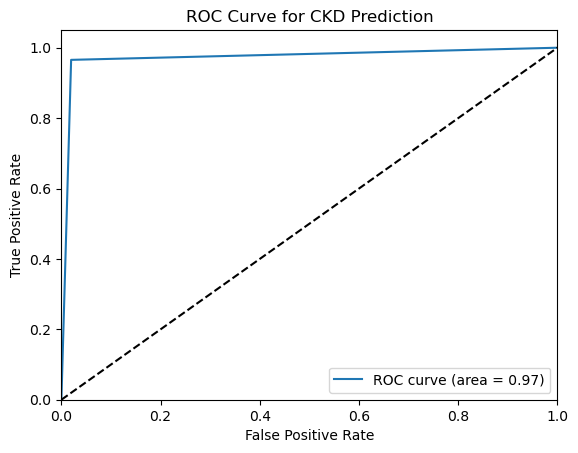

In [12]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CKD Prediction')
plt.legend(loc="lower right")
plt.show()

In [13]:
import shap
explainer =shap.Explainer(model.predict,X_test)

/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
shap_values = explainer(X_test)


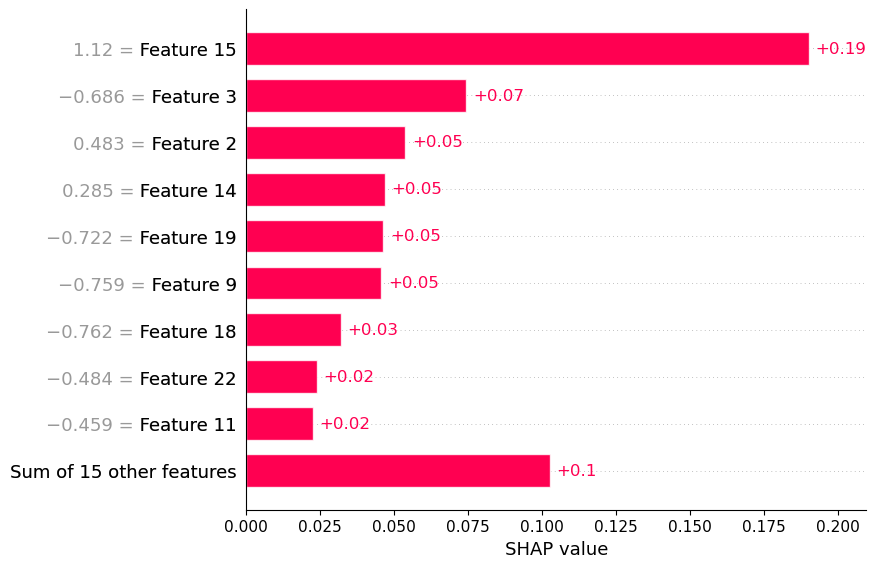

In [15]:
shap.plots.bar(shap_values[27])

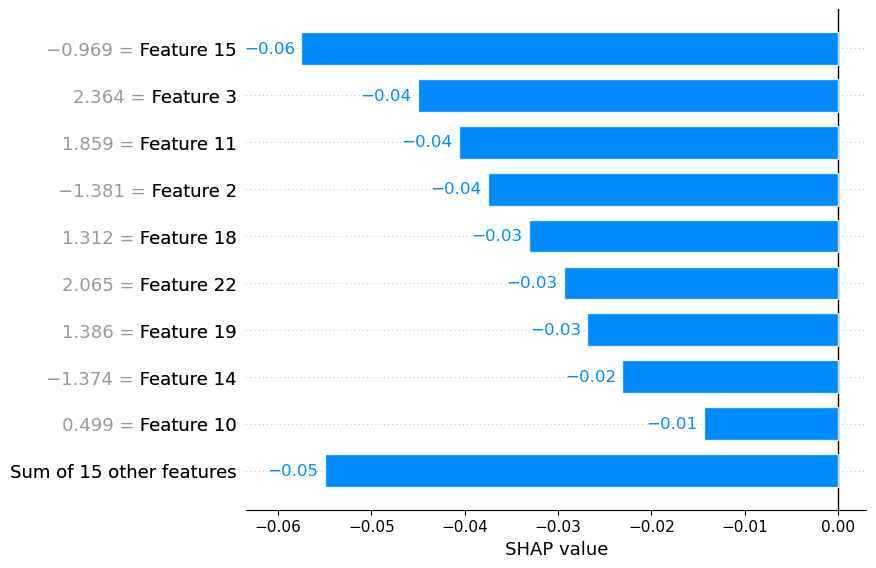

In [16]:
shap.plots.bar(shap_values[77])

In [17]:
import eli5
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)


In [18]:
# Explain model predictions
eli5.explain_prediction(model, X_test_df.iloc[0])

/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Explanation(estimator="SVC(kernel='linear')", description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='hemo', weight=1.0914907263115536, std=None, value=1.6490734089705075), FeatureWeight(feature='al', weight=0.4582824314827486, std=None, value=-0.686243566496721), FeatureWeight(feature='dm', weight=0.4569652274183339, std=None, value=-0.7217427156047488), FeatureWeight(feature='sg', weight=0.43257268871038246, std=None, value=0.48335471355144), FeatureWeight(feature='pcv', weight=0.32356008076224857, std=None, value=0.2598613320473695), FeatureWeight(feature='bu', weight=0.3111581210058929, std=None, value=-0.516528465953133), FeatureWeight(feature='htn', weight=0.3057217759752303, std=None, value=-0.7622517090726592), FeatureWeight(feature='sc', weight=0.2039025060748756, std=None, value=-0.3337432259755716), FeatureWeight(feature='appet', weight=0.18296890753482453, std=None, value=-0.5078007830046403), FeatureWeight(feature='pe', weight=0.17958059443232793, std=None, value=-0.4843221048378526), FeatureWeight(feature='su', weight=0.17933274553603834, std=None, value=-0.380269421977175), FeatureWeight(feature='bgr', weight=0.1643666594633843, std=None, value=-0.30681829542262407), FeatureWeight(feature='rc', weight=0.07841287485182889, std=None, value=0.22944535303962035), FeatureWeight(feature='rbc', weight=0.06971070228294815, std=None, value=0.3648896763690089), FeatureWeight(feature='wc', weight=0.0269842836329917, std=None, value=-1.1135123847696682), FeatureWeight(feature='age', weight=0.011281712251562263, std=None, value=-0.14647958515521242), FeatureWeight(feature='pc', weight=0.00554734648426729, std=None, value=0.48432210483785243), FeatureWeight(feature='ane', weight=0.005286294885007818, std=None, value=-0.42008402520840293), FeatureWeight(feature='pcc', weight=5.1286490975372886e-17, std=None, value=-0.3425177889602085)], neg=[FeatureWeight(feature='<BIAS>', weight=-2.8361199114992783, std=None, value=1.0), FeatureWeight(feature='bp', weight=-0.10787724179228768, std=None, value=0.25421377630545117), FeatureWeight(feature='sod', weight=-0.07532796010092709, std=None, value=0.16004397610030618), FeatureWeight(feature='pot', weight=-0.05221547403181629, std=None, value=-0.258230669202415), FeatureWeight(feature='ba', weight=-1.894161840971723e-17, std=None, value=-0.2412489548185819), FeatureWeight(feature='cad', weight=-1.6920942138806783e-17, std=None, value=-0.3047887380849036)], pos_remaining=0, neg_remaining=0), proba=None, score=1.415585091672137, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [19]:
from interpret import show
from interpret.glassbox import ExplainableBoostingClassifier

# Create an Explainable Boosting Classifier
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)

# Visualize global and local explanations
show(ebm.explain_global())
show(ebm.explain_local(X_test))

/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/

<!-- http://127.0.0.1:7767/10953190048/ -->

<!-- http://127.0.0.1:7767/10953315408/ -->

In [20]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.200000,1,1,0,0,0,0,ckd
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.707435,0,0,0,0,0,0,ckd
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.707435,0,1,0,1,0,1,ckd
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.900000,1,0,0,1,1,1,ckd
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.600000,0,0,0,0,0,0,ckd
